# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [12]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [13]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # Pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | atafu village
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | bethel
Processing Record 6 of Set 1 | hawaiian paradise park
Processing Record 7 of Set 1 | tura
Processing Record 8 of Set 1 | prainha
Processing Record 9 of Set 1 | ta`u
Processing Record 10 of Set 1 | uliastay
Processing Record 11 of Set 1 | uturoa
Processing Record 12 of Set 1 | isafjordur
Processing Record 13 of Set 1 | chonchi
Processing Record 14 of Set 1 | vorgashor
Processing Record 15 of Set 1 | al mijlad
Processing Record 16 of Set 1 | bayevo
Processing Record 17 of Set 1 | hermanus
Processing Record 18 of Set 1 | mariehamn
Processing Record 19 of Set 1 | edinburgh of the seven seas
Processing Record 20 of Set 1 | whangarei
Processing Record 21 of Set 1 | jamestown
Processing Record 22 of Set 1 | adamstown

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atafu village,-8.5421,-172.5159,28.03,72,100,8.41,TK,1736389846
1,blackmans bay,-43.0167,147.3167,23.62,48,100,4.37,AU,1736389847
2,port-aux-francais,-49.3500,70.2167,6.64,98,100,11.81,TF,1736389849
3,punta arenas,-53.1500,-70.9167,8.06,66,20,10.29,CL,1736389702
4,bethel,41.3712,-73.4140,-5.95,59,0,4.63,US,1736389851


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atafu village,-8.5421,-172.5159,28.03,72,100,8.41,TK,1736389846
1,blackmans bay,-43.0167,147.3167,23.62,48,100,4.37,AU,1736389847
2,port-aux-francais,-49.3500,70.2167,6.64,98,100,11.81,TF,1736389849
3,punta arenas,-53.1500,-70.9167,8.06,66,20,10.29,CL,1736389702
4,bethel,41.3712,-73.4140,-5.95,59,0,4.63,US,1736389851


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

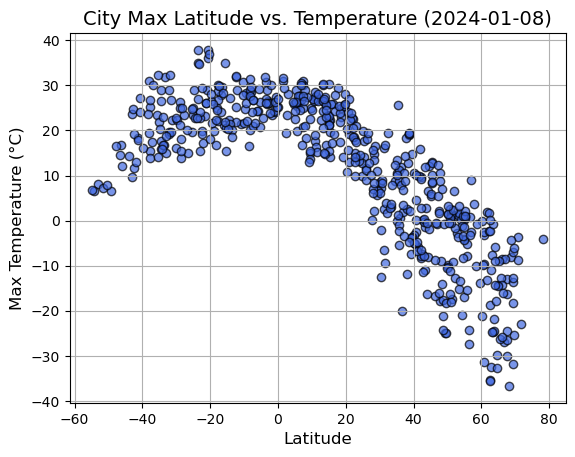

In [18]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors="black", marker='o', color='royalblue', alpha=0.7)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-01-08)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (°C)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

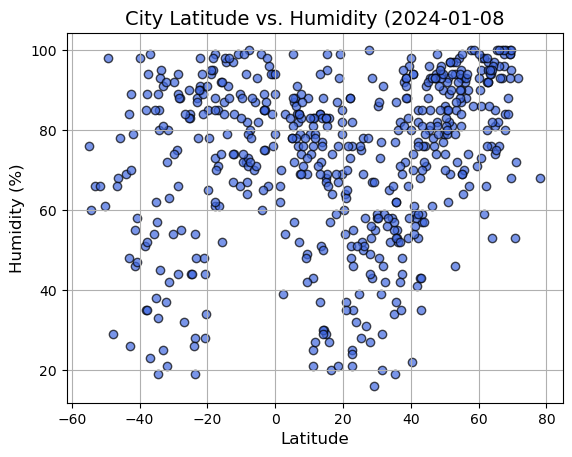

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors="black", color='royalblue', alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-01-08", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

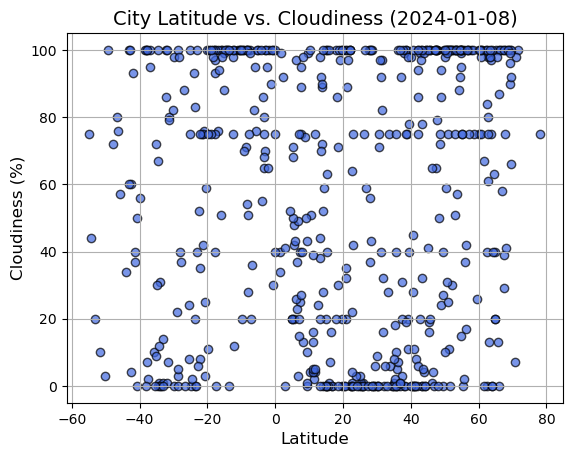

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors="black", color='royalblue', alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-01-08)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

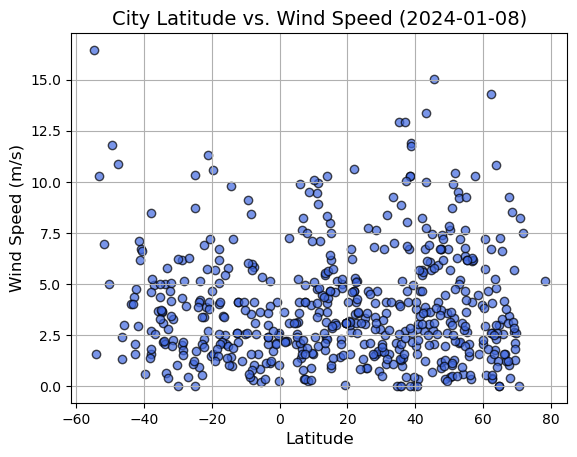

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors="black", color='royalblue', alpha=0.7)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-01-08)", fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (m/s)", fontsize=12)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [49]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, output_filename):
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Calculate r-squared
    r_squared = r_value ** 2
    # Create the regression line
    regression_line = slope * np.array(x_values) + intercept

    # Plot the data and the regression line
    plt.scatter(x_values, y_values, edgecolors="black", marker='o', color='royalblue', alpha=0.7)
    plt.plot(x_values, regression_line, color='red', linewidth=2)
    plt.annotate(line_eq,(6,10),fontsize=15,color="red")
    # Incorporate the graph properties
    plt.title(title, fontsize=14)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)

    # Show the r-squared value on the plot
    print(f"The r-squared value is: {r_squared:.2f}")

    # Save the figure
    plt.savefig(output_filename)

    # Show plot
    plt.show()

In [50]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,bethel,41.3712,-73.4140,-5.95,59,0,4.63,US,1736389851
5,hawaiian paradise park,19.5933,-154.9731,25.73,82,100,3.09,US,1736389852
6,tura,25.5198,90.2201,17.57,52,0,0.89,IN,1736389853
9,uliastay,47.7417,96.8444,-17.81,82,100,0.90,MN,1736389856
11,isafjordur,66.0755,-23.1240,-8.54,76,0,4.18,IS,1736389858


In [51]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,atafu village,-8.5421,-172.5159,28.03,72,100,8.41,TK,1736389846
1,blackmans bay,-43.0167,147.3167,23.62,48,100,4.37,AU,1736389847
2,port-aux-francais,-49.3500,70.2167,6.64,98,100,11.81,TF,1736389849
3,punta arenas,-53.1500,-70.9167,8.06,66,20,10.29,CL,1736389702
7,prainha,-1.8000,-53.4800,23.41,96,100,1.72,BR,1736389854


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.73


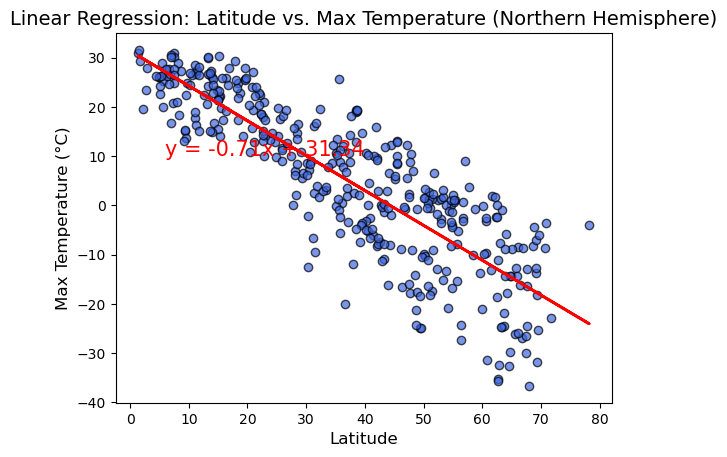

In [52]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 
                       "Latitude", "Max Temperature (°C)", 
                       "Linear Regression: Latitude vs. Max Temperature (Northern Hemisphere)", 
                       "output_data/NorthernHemisphere_Lat_vs_MaxTemp_Regression.png")

The r-squared value is: 0.28


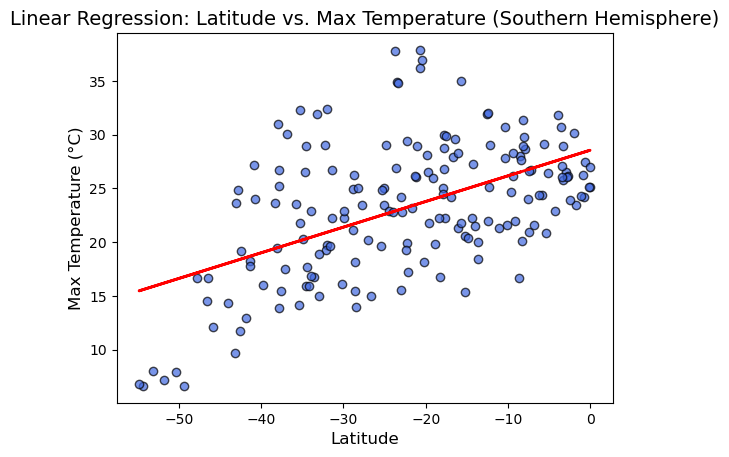

In [54]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 
                       "Latitude", "Max Temperature (°C)", 
                       "Linear Regression: Latitude vs. Max Temperature (Southern Hemisphere)", 
                       "output_data/SouthernHemisphere_Lat_vs_MaxTemp_Regression.png")

**Discussion about the linear relationship: The linear regression plot of temperature vs. latitude shows a negative correlation, with temperatures generally decreasing as latitude increases. This aligns with the common understanding that regions closer to the equator (at lower latitudes) tend to have warmer temperatures, while higher latitudes (closer to the poles) experience cooler temperatures. The regression line has a slope of -0.5°C per degree of latitude, indicating that for every degree increase in latitude, the temperature decreases by half a degree Celsius.

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.15


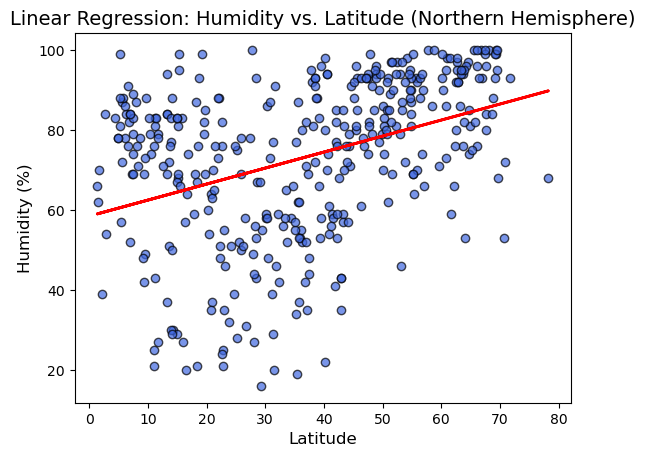

In [63]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 
                       "Latitude", "Humidity (%)", 
                       "Linear Regression: Humidity vs. Latitude (Northern Hemisphere)", 
                       "output_data/NorthernHemisphere_Lat_vs_Humidity_Regression.png")

The r-squared value is: 0.12


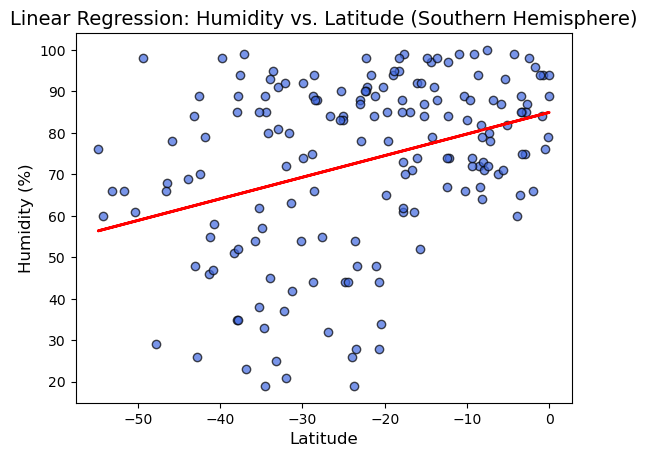

In [56]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], 
                       "Latitude", "Humidity (%)", 
                       "Linear Regression: Humidity vs. Latitude (Southern Hemisphere)", 
                       "output_data/SouthernHemisphere_Lat_vs_Humidity_Regression.png")

**Discussion about the linear relationship: The linear regression plot of humidity vs. latitude shows a weak negative correlation, with humidity generally decreasing as latitude increases. This could be due to the warmer, more humid conditions near the equator, where higher temperatures promote more moisture in the air. As we move towards higher latitudes, the cooler, drier conditions typically reduce the air’s moisture capacity, leading to lower humidity levels.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.09


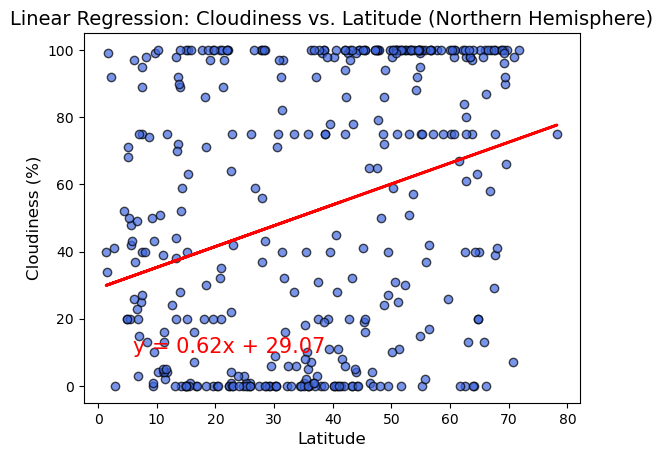

In [58]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 
                       "Latitude", "Cloudiness (%)", 
                       "Linear Regression: Cloudiness vs. Latitude (Northern Hemisphere)", 
                       "output_data/NorthernHemisphere_Lat_vs_Cloudiness_Regression.png")

The r-squared value is: 0.12


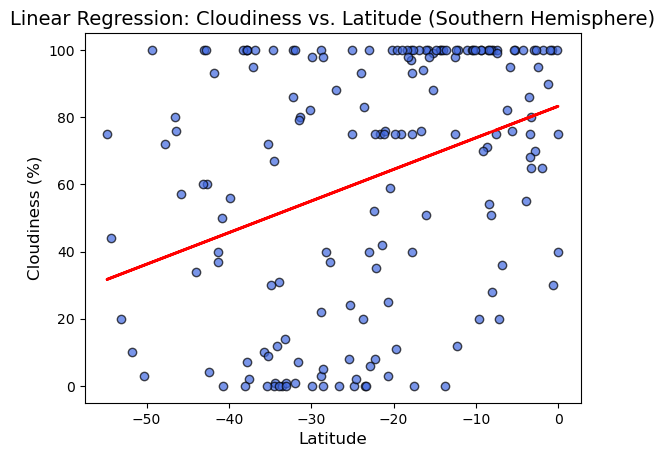

In [59]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], 
                       "Latitude", "Cloudiness (%)", 
                       "Linear Regression: Cloudiness vs. Latitude (Southern Hemisphere)", 
                       "output_data/SouthernHemisphere_Lat_vs_Cloudiness_Regression.png")

**Discussion about the linear relationship:** the Northern Hemisphere shows a positive relationship between cloudiness and latitude, with cloudiness generally increasing as latitude increases. This trend is influenced by the land-ocean distribution and seasonal variations in the Northern Hemisphere. In contrast, the Southern Hemisphere shows a postitive relationship between cloudiness and latitude, with more consistent cloud cover likely due to the extensive oceans and more stable atmospheric conditions

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.00


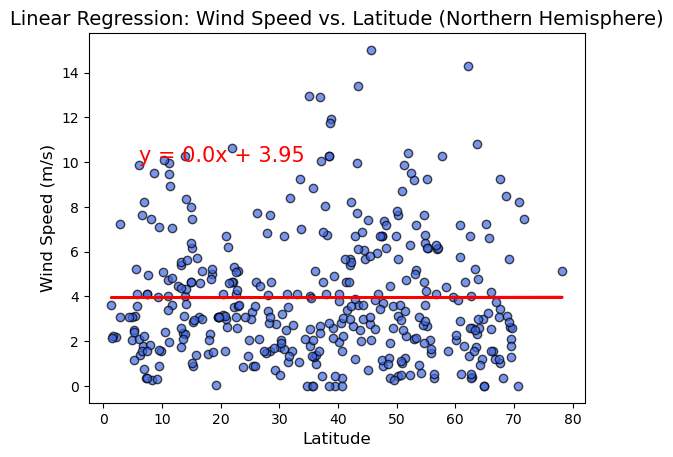

In [60]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], 
                       "Latitude", "Wind Speed (m/s)", 
                       "Linear Regression: Wind Speed vs. Latitude (Northern Hemisphere)", 
                       "output_data/NorthernHemisphere_Lat_vs_WindSpeed_Regression.png")

The r-squared value is: 0.08


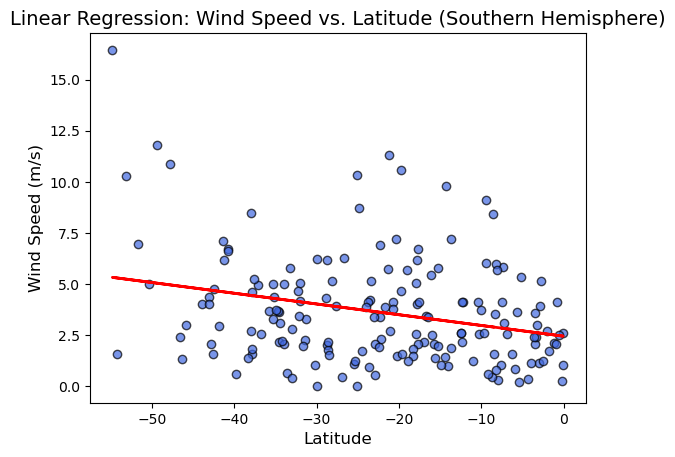

In [61]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 
                       "Latitude", "Wind Speed (m/s)", 
                       "Linear Regression: Wind Speed vs. Latitude (Southern Hemisphere)", 
                       "output_data/SouthernHemisphere_Lat_vs_WindSpeed_Regression.png")

**Discussion about the linear relationship:, the Northern Hemisphere shows a no clear relationship between wind speed and latitude, with wind speeds generally increasing as latitude increases. This pattern is influenced by pressure systems, the Coriolis effect, and the prevalence of the Westerlies in the mid-latitudes. In contrast, the Southern Hemisphere shows a [negative relationship between wind speed and latitude, with stronger winds generally observed in higher latitudes, likely due to the Southern Westerlies and more consistent oceanic climate."